# Formspring
This dataset is used to identify traces of cyberbullying.

## Imports

In [1]:
from Classification import Benchmark, ClassifierType, MetricType, FeatureExtraction, FeatureExtractionStep
from Data import Dataset
from PreProcessing import CorpusName, CorpusParser
from Utils import Log, Time
from Utils.Log import LogOutput, LogLevel
# import seaborn as sns
# from matplotlib import pyplot as plt
# from scikitplot import metrics as skplt

## Corpus

The corpus is selected and the results path initialized.

In [2]:
corpus = CorpusName.FORMSPRING
corpus_path = "./datasets/formspring/formspring_data.csv"
results_path = f'./results/{Time.get_timestamp("%Y-%m-%d")}_{corpus.name}'

## Logging

The logging facility is initialized with the necessary parameters.

In [3]:
Log.level = LogLevel.INFO
Log.output = LogOutput.BOTH
Log.path = results_path
Log.clear()
Log.init()

## Corpus parser and dataset container

The parser and the dataset container are initialized. 
The democratic parameter is used as discussed in section 3.3.2 of [my dissertation](https://stefanofrazzetto.com/dissertation/).

In [4]:
parser = CorpusParser.factory(corpus_name=corpus, source_path=corpus_path, democratic=True)
dataset = Dataset(parser.get_params(), corpus_name=corpus)

parser.parse()
parser.log_info()

[2019-06-13 21:41:27] Positive: 764 - Negative: 12009 / Total: 12773


## Populating the dataset

The dataset is populated with the samples extracted through the parser.

In [5]:
parser.add_to_dataset(dataset)
dataset.finalize()
dataset.log_info()

Subset,Positive,Negative,Positive %
Training,650,10207,5.99
Testing,114,1802,5.95


Total positives,Total negatives,Training %,Testing %
764,12009,85,15


## Balance subsets
Training and testing subsets are balanced with a 5:1 ratio (negatives:positives), if achievable.

In [6]:
dataset.balance_all(5, random_state=None)
dataset.log_info()

[2019-06-13 21:41:28] Dropping training samples for the majority class.
[2019-06-13 21:41:28] Dropping testing samples for the majority class.


Subset,Positive,Negative,Positive %
Training,650,3250,16.67
Testing,114,570,16.67


Total positives,Total negatives,Training %,Testing %
764,3820,85.08,14.92


## Initialize feature extraction pipeline

The feature extraction pipeline is initialized: tokenization and term frequency--inverse document frequence will be used on the training samples, while leaving the maximum number of feature unbounded. 

In [11]:
feature_extraction = FeatureExtraction(
    FeatureExtractionStep.TOKENIZE,
    FeatureExtractionStep.TFIDF,
    dataset=dataset,
    max_features=None,
)

[nltk_data] Downloading package punkt to /home/stefano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[2019-06-13 21:45:55] Executing fit_transform using the following pipeline:
[2019-06-13 21:45:55] 	- CountVectorizer
[2019-06-13 21:45:55] 	- Tokenizer
[2019-06-13 21:45:56] 	- TF-IDF
[2019-06-13 21:45:56] # vectors: 3900
[2019-06-13 21:45:56] # features: 8482
[2019-06-13 21:45:56] # label 0: 3250
[2019-06-13 21:45:56] # label 1: 650


## Initialize classifiers
Classifiers are added to the benchmark and initialized with the data extracted using the previously created pipeline.

In [12]:
benchmark = Benchmark(dataset=dataset, feature_extraction=feature_extraction)
benchmark.add_classifier(ClassifierType.RandomForest)
benchmark.add_classifier(ClassifierType.MultiLayerPerceptron)
benchmark.add_classifier(ClassifierType.SupportVectorMachine)
benchmark.add_classifier(ClassifierType.MultinomialNaiveBayes)
benchmark.add_classifier(ClassifierType.LogisticRegression)
benchmark.initialize_classifiers()

[2019-06-13 21:46:01] Initializing classifiers.
[2019-06-13 21:46:09] Classifiers initialized correctly.


## Run benchmark

The benchmark is run on the testing subset. This subset is split into five smaller subsets.


In [19]:
benchmark.run(5)

[2019-06-13 21:54:41] Starting benchmarking process.
[2019-06-13 21:54:43] Benchmark process completed.


## Plots

Results are plotted using different plots, depending on the metric.



[2019-06-13 21:54:46] Generating plots... 


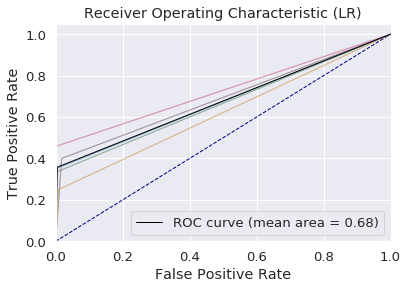

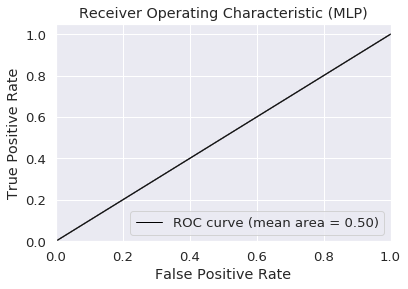

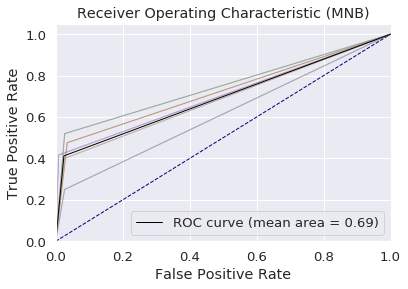

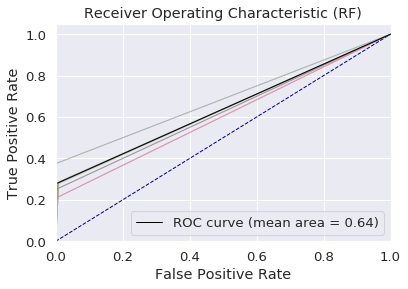

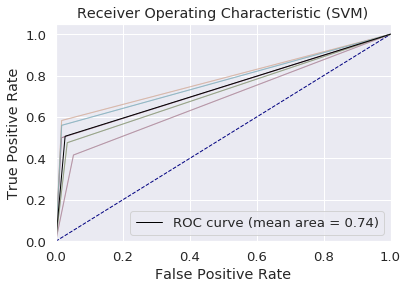

[2019-06-13 21:54:47] done.


In [20]:
benchmark.plot_metrics(MetricType.ROC)